# Сборный проект. Анализ продаж компьютерных игр в интернет-магазине

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Исходные данные

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## (Шаг 1). Ознакомление с данными

**Подключаем необходимые библиотеки**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

**Откроем датафрейм и выведем информацию по нему.**

In [2]:
data_games_sales = pd.read_csv('C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 4 (сборный)/games.csv')
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data_games_sales.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Проверка данных по каждому столбцу.**

In [4]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

In [5]:
check_columns(data_games_sales)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 

**Проверим пропуски**

In [6]:
data_games_sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data_games_sales[data_games_sales['User_Score'] == '0']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [8]:
data_games_sales[data_games_sales['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data_games_sales[data_games_sales['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data_games_sales[data_games_sales['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data_games_sales[data_games_sales['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data_games_sales[data_games_sales['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
data_games_sales[data_games_sales['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
data_games_sales['Name'].value_counts()

Need for Speed: Most Wanted                    12
Ratatouille                                     9
FIFA 14                                         9
LEGO Marvel Super Heroes                        9
Madden NFL 07                                   9
                                               ..
Body Harvest                                    1
Infamous: First Light                           1
Pokemon Ranger: Guardian Signs                  1
The Legend of Heroes III: Song of the Ocean     1
S.Y.K: Shinsetsu Saiyuuki Portable              1
Name: Name, Length: 11559, dtype: int64

In [15]:
data_games_sales[data_games_sales['Name'] == 'Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


**Выводы по шагу 1**


Типы переменных:

1. Категориальный: Name, Platform, Genre, Rating.  
2. Количественный: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.
 
Данные имеют несколько аномалий:

- Пропуски по столцам Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
- Аномалия tbd. Расшифровывается с ангилийского "to be defined". Это нормальное явление для компьютерных игр. Компьютерная игра должна пройте через определенное количество игроков или экспертов-геймеров, чтобы они дали оценку игре. По своей сути это аналогично значению NaN.
- Тип столбца Year_of_Release. Год - целое число.
- Дубликаты по имени, платформе и году выпуска. Возможно эту игру вносили несколько раз, давая информацию о разных рынках продажи.

Случайный тип аномалии:

- Пропуски в столбцах Name и Genre. Это строки 659 и 14244. По году и платформе видно. Что это одна и также игра, только в одной строке храниться данные о продажах в Европе и Америке, а во второй - только по Японии.
- Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей или издателей игр.

Вывод по шагу 1
Типы переменных:

Категориальный: Name, Platform, Genre, Rating.
Количественный: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.
Столбец User_Score отнесен к количественной переменной. "to be defined" - это отсутсвие оценки на момент выгрузки дата фрейма.

Данные имеют несколько аномалий:

Пропуски по столцам Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.
Аномалия tbd. Расшифровывается с ангилийского "to be defined". Это нормальное явление для компьютерных игр. Компьютерная игра должна пройте через определенное количество игроков или экспертов-геймеров, чтобы они дали оценку игре.
Тип столбца Year_of_Release. Год - целое число.
Дубликаты по имени, платформе и году выпуска. Возможно эту игру вносили несколько раз, давая информацию о разных рынках продажи.
Данные требуют предобработки.

Случайный тип аномалии:

- Пропуски в столбцах Name и Genre. Это строки 659 и 14244. По году и платформе видно. Что это одна и также игра, только в одной строке храниться данные о продажах в Европе и Америке, а во второй - только по Японии.
- Пропуск в столбце Year_of_Release. Аггрегатор игр мог и не получить информацию от создателей или издателей игр.

Неслучайный тип аномалии

- Пропуски в столбцах Critic_Score, User_Score и Rating. Оценка игр проходит не быстро, а может даже вообще не пройти, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка



## (Шаг 2). Подготовка данных

### Изменение название столбцов

In [16]:
data_games_sales.columns = data_games_sales.columns.str.lower()
data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типа данных

Изменения требуются в столбце:
- user_score в тип float. Сейчас они "object" из-за "tbd", который как я писал выше аналогичен "NaN"

In [17]:
data_games_sales['user_score'] = data_games_sales['user_score'].replace('tbd', np.NaN)
data_games_sales['user_score'] = data_games_sales['user_score'].astype('float')

In [18]:
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Строки 659 и 14244 невозможно восстановить, удалим их.

In [19]:
data_games_sales.drop([659, 14244],inplace=True)
data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [20]:
data_games_sales.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

- critic_score и user_score

В этих столбцах нельзя выявить средние или медианные закономерности по году или жанру. Каждая игра получается индивидуальной и оценка критиков, и пользователей - субъективное мнение об игре конкретного года, жанра, платформы, студии разработчика, издателя, рекламы и репутации о серии игр. Слишком много факторов необходимо учесть для восстановления данных.

Пропусков в "year_of_release" - не очень много в сравнении со всем датафреймом. Думаю можно оставить как есть.

rating - рейтинг от ESRB - может быть, в те времена не было такой организации, вот и рейтинга от неё тоже нет. Невозможно дать рейтинг игре, посчитав его как среднее рейтингов игр того же жанра. Поставим рейтинг "No ESRB";

In [21]:
data_games_sales['rating'] = data_games_sales['rating'].fillna('No ESRB')
# Проверим пропуски
data_games_sales.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Суммарные продажи во всех регионах

In [22]:
data_games_sales['world_sales'] = data_games_sales['na_sales'] + data_games_sales['eu_sales'] + data_games_sales['jp_sales'] + data_games_sales['other_sales']
data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No ESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No ESRB,31.38


**Вывод по шагу 2**

Данные готовы к анализу. Было выполнено следующее.

1. Название столбцов было приведено к нижнему регистру
2. Восстановлены пропуски в строках.
3. Удалены строки без нужных данных.
4. Добавлен столбец суммарных продаж.

## (Шаг 3). Исследовательский анализ

При выполнении данного шага, ответим на следующие вопросы:
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

7. Соотнесите выводы с продажами игр на других платформах.

8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [23]:
year_of_release_pivot_table = pd.pivot_table(data_games_sales, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


<AxesSubplot:xlabel='year_of_release'>

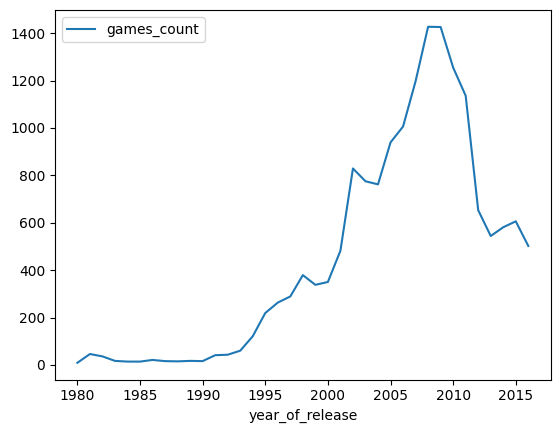

In [24]:
year_of_release_pivot_table.plot()

Ответ на 1 вопрос.

Данные по всем периодам не важны.

С 1980 годов по 1993 было мало компаний и мало охвата игроков, как и качественных оценок от критиков. Тенденция выпускать больше игр пришла вместе с технологическим прорывом: появлением персонального компьютера (PC) и технологий языков программирования.

В 2002 году видно, что выпустилось много игр. Это значит в период с 1997 по 2002 появились игровые движки для создания реалистичных игр и новые средства программирования.

Пик в 2009 это не только популярность к созданию компьютерных игр, но и распространенность компьютерных движков, некоторые из которых бесплатны к использованию на сегодняшний день.

Спад индустри игр с 2012 по 2016 обусловлен экономическим кризисом и требованиям к игре. Крупные студии-разработчики как Blizzard создают игры по 10-15 лет, так как хотят порадовать своих фанатов новым гемплеем, современными технологиями и новой графикой.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
platform_sales_pivot_table = pd.pivot_table(data_games_sales, index=['platform'], values='world_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('world_sales',ascending=False)
platform_sales_pivot_table

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [26]:
best_sales_platform = list(platform_sales_pivot_table.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Платформа  PS2
                 world_sales
year_of_release             
2000.0                 39.17
2001.0                166.43
2002.0                205.38
2003.0                184.31
2004.0                211.81
2005.0                160.66
2006.0                103.42
2007.0                 75.99
2008.0                 53.90
2009.0                 26.40
2010.0                  5.64
2011.0                  0.45


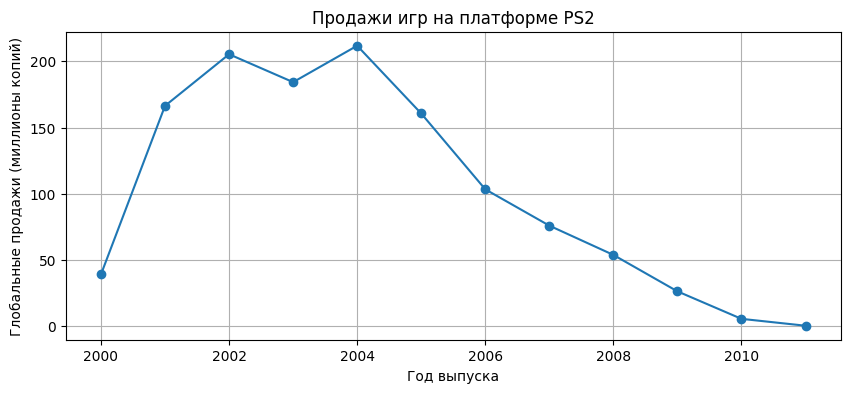

Платформа  X360
                 world_sales
year_of_release             
2005.0                  8.25
2006.0                 51.62
2007.0                 95.41
2008.0                135.26
2009.0                120.29
2010.0                170.03
2011.0                143.84
2012.0                 99.74
2013.0                 88.58
2014.0                 34.74
2015.0                 11.96
2016.0                  1.52


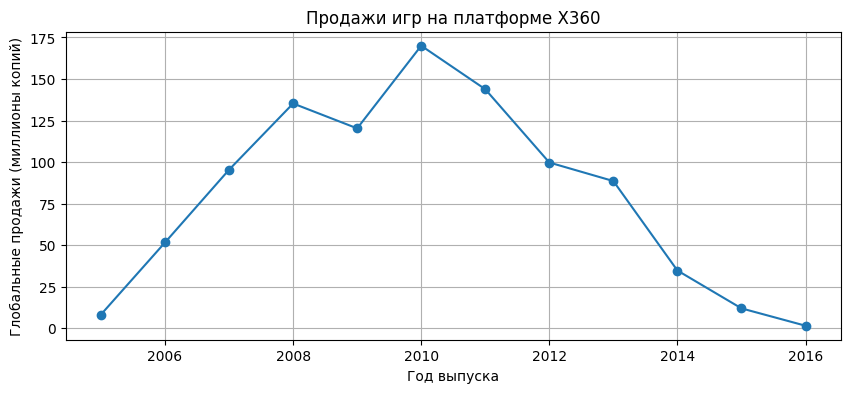

Платформа  PS3
                 world_sales
year_of_release             
2006.0                 20.96
2007.0                 73.19
2008.0                118.52
2009.0                130.93
2010.0                142.17
2011.0                156.78
2012.0                107.36
2013.0                113.25
2014.0                 47.76
2015.0                 16.82
2016.0                  3.60


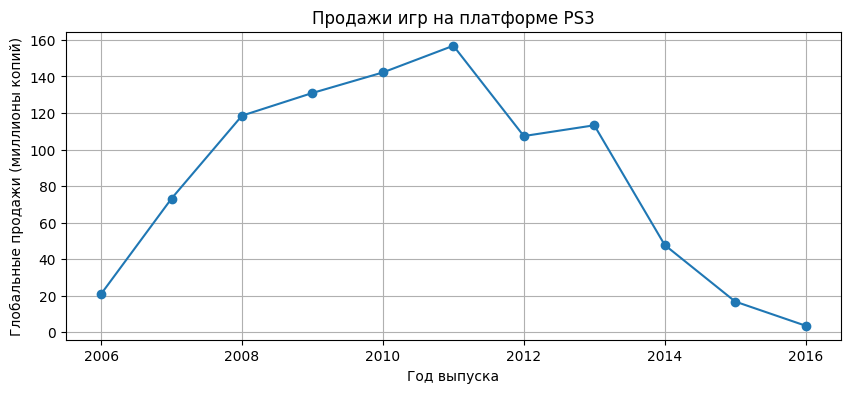

Платформа  Wii
                 world_sales
year_of_release             
2006.0                137.15
2007.0                152.77
2008.0                171.32
2009.0                206.97
2010.0                127.95
2011.0                 59.65
2012.0                 21.71
2013.0                  8.59
2014.0                  3.75
2015.0                  1.14
2016.0                  0.18


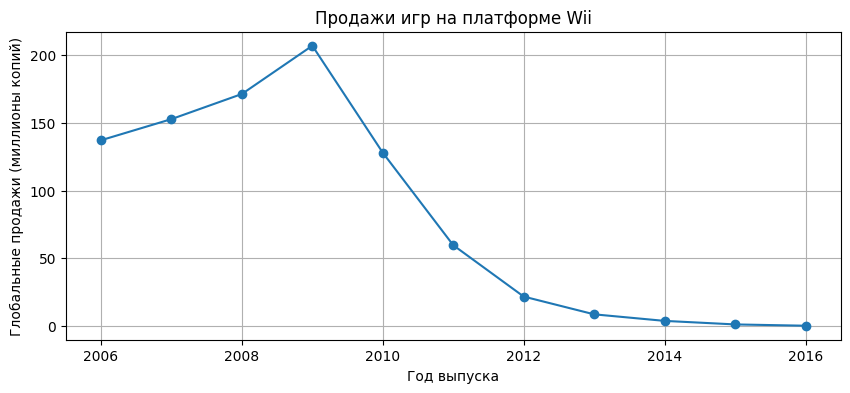

Платформа  DS
                 world_sales
year_of_release             
1985.0                  0.02
2004.0                 17.27
2005.0                130.14
2006.0                119.81
2007.0                146.94
2008.0                145.31
2009.0                119.54
2010.0                 85.02
2011.0                 26.18
2012.0                 11.01
2013.0                  1.54


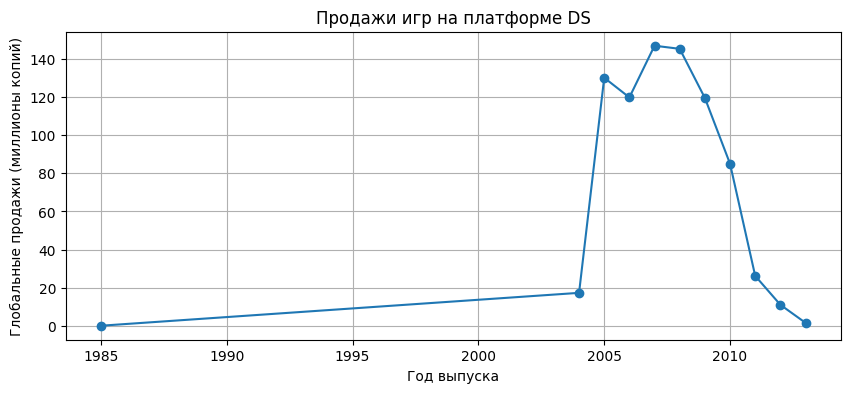

Платформа  PS
                 world_sales
year_of_release             
1994.0                  6.03
1995.0                 35.96
1996.0                 94.70
1997.0                136.17
1998.0                169.49
1999.0                144.53
2000.0                 96.37
2001.0                 35.59
2002.0                  6.67
2003.0                  2.07


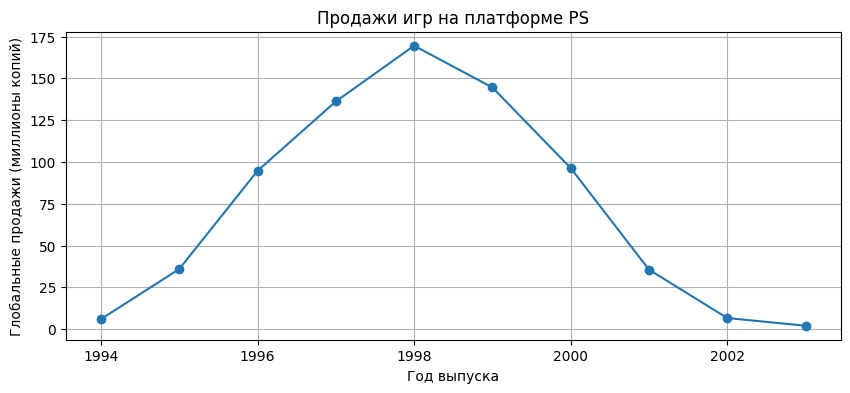

In [27]:
for platform in best_sales_platform:
    platform_sales_data = data_games_sales.query('platform == @platform')
    
    
    platform_sales_pivot_table = pd.pivot_table(platform_sales_data, index='year_of_release', values='world_sales', aggfunc='sum')
    print('Платформа ',platform)
    print(platform_sales_pivot_table)
    
    
    plt.figure(figsize=(10, 4))
    plt.plot(platform_sales_pivot_table.index, platform_sales_pivot_table['world_sales'], marker='o', linestyle='-')
    
    
    plt.title(f'Продажи игр на платформе {platform}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Глобальные продажи (миллионы копий)')
    
    plt.grid(True)
    plt.show()

Платформа PS4
                 world_sales
year_of_release             
2013.0                 25.99
2014.0                100.00
2015.0                118.90
2016.0                 69.25


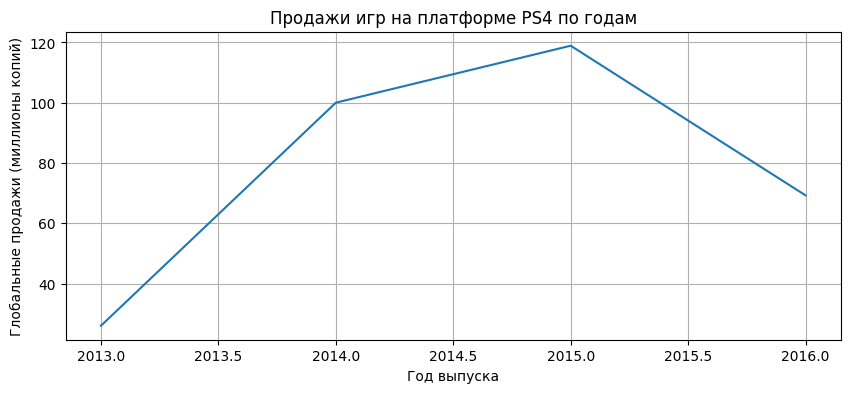

In [28]:
print('Платформа', 'PS4')
platform_sales_pivot_table = pd.pivot_table(data_games_sales.query('platform == "PS4"'), index=['year_of_release'], values='world_sales', aggfunc='sum')
print(platform_sales_pivot_table)


plt.figure(figsize=(10, 4))
plt.plot(platform_sales_pivot_table.index, platform_sales_pivot_table['world_sales'])
plt.title('Продажи игр на платформе PS4 по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи (миллионы копий)')
plt.grid(True)

plt.show()

Ответ на вопрос 2.

Для платформ, которые пользуются популярностью, срок использования равен 8-12 лет. Можно проследить, как менялись поколения для приствок PlayStation:

- PS 1994-2003  
- PS2 2000-2011  
- PS3 2006-2016  
- PS4 2013-по сегодняшний день  

Получается каждые 5-7 лет компания Sony выпускает новую платформу с лучшими техническими параметрами, а игры на предыдущей платформе еще существуют на рынке 3 года.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Возьмем данные за период с 2013 по 2016 год.



In [29]:
actual_data_games_sales = data_games_sales.query('year_of_release > 2012')
actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float64(8), object(4)
memory usage: 226.8+ KB


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

**Определим самые прибыльные платформы за актуальный период.**

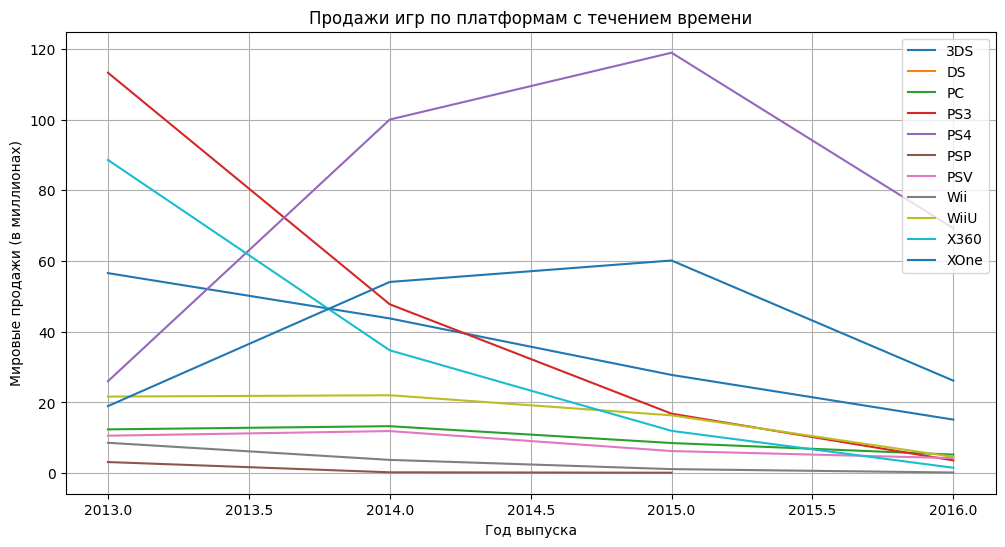

,platform,year_of_release,world_sales
0,3DS,2013.0,56.57
1,3DS,2014.0,43.76
2,3DS,2015.0,27.78
3,3DS,2016.0,15.14
4,DS,2013.0,1.54
5,PC,2013.0,12.38
6,PC,2014.0,13.28
7,PC,2015.0,8.52
8,PC,2016.0,5.25
9,PS3,2013.0,113.25


In [30]:
# Создадим сводную таблицу
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform', 'year_of_release'], values='world_sales', aggfunc='sum')
best_sales_platform.reset_index(inplace=True)


plt.figure(figsize=(12, 6))

# Цикл по уникальным платформам для построения линий разных цветов
platforms = best_sales_platform['platform'].unique()
for platform in platforms:
    data = best_sales_platform[best_sales_platform['platform'] == platform]
    plt.plot(data['year_of_release'], data['world_sales'], label=platform)

# Настроим оси и легенду
plt.xlabel('Год выпуска')
plt.ylabel('Мировые продажи (в миллионах)')
plt.title('Продажи игр по платформам с течением времени')
plt.legend(loc='best')

# Отображение графика
plt.grid()
plt.show()

best_sales_platform

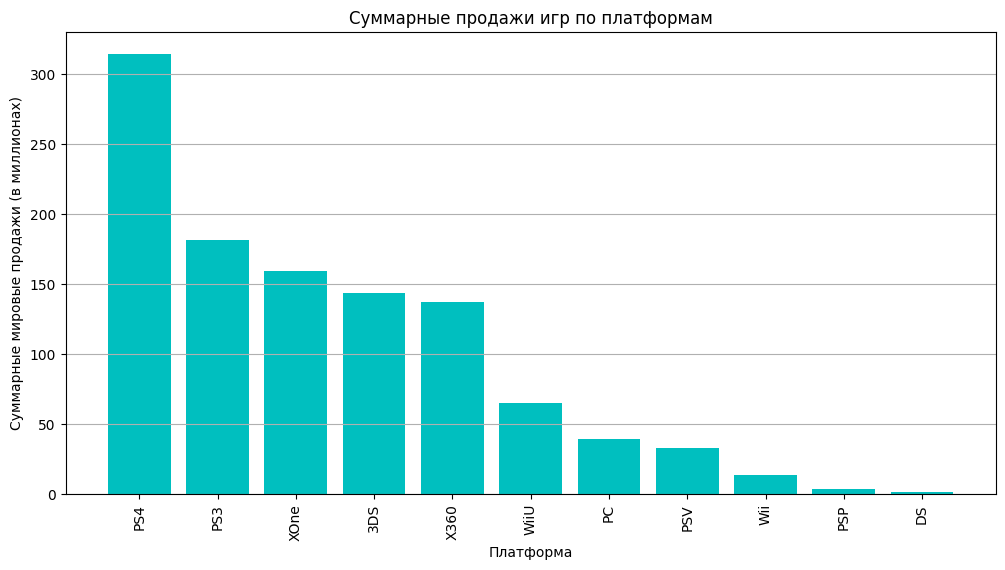

,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [31]:
# Создаем сводную таблицу
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform'], values='world_sales', aggfunc='sum')

# Отсортируйем таблицу по суммарным продажам
best_sales_platform = best_sales_platform.sort_values('world_sales', ascending=False)


plt.figure(figsize=(12, 6))

# Создадим линейную диаграмму
plt.bar(best_sales_platform.index, best_sales_platform['world_sales'], color='c')

# Настройка оси и заголовок
plt.xlabel('Платформа')
plt.ylabel('Суммарные мировые продажи (в миллионах)')
plt.title('Суммарные продажи игр по платформам')

# Поворачиваем метки по оси X для лучшей читаемости
plt.xticks(rotation=90)

# Отображение графика
plt.grid(axis='y')
plt.show()

# Вывод самой таблицы
best_sales_platform

Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS. Их суммарный доход за 3 года около 1 миллиарда долларов.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii и PSP соотвественно. Так же можно заметить прирост у PC.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

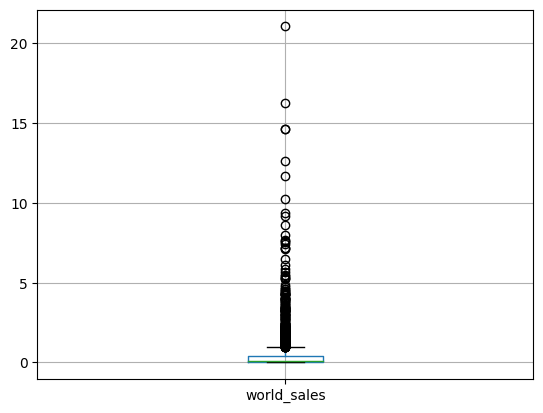

In [32]:
actual_data_games_sales.boxplot(column = 'world_sales')
actual_data_games_sales['world_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

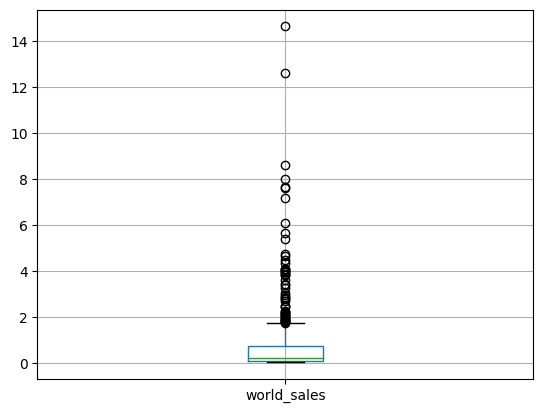

In [33]:
PS4_actual_data_games_sales = actual_data_games_sales.query('platform =="PS4"')
PS4_actual_data_games_sales.boxplot(column = 'world_sales')
PS4_actual_data_games_sales['world_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: world_sales, dtype: float64

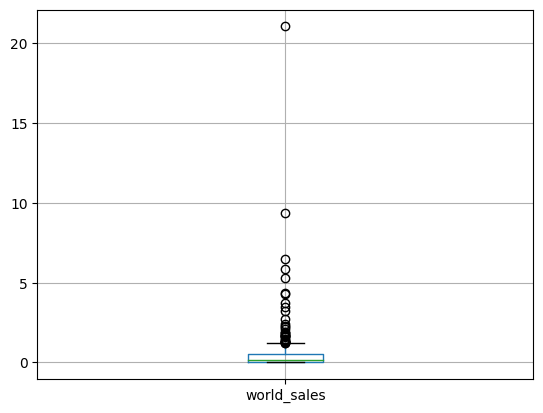

In [34]:
PS3_actual_data_games_sales = actual_data_games_sales.query('platform =="PS3"')
PS3_actual_data_games_sales.boxplot(column = 'world_sales')
PS3_actual_data_games_sales['world_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

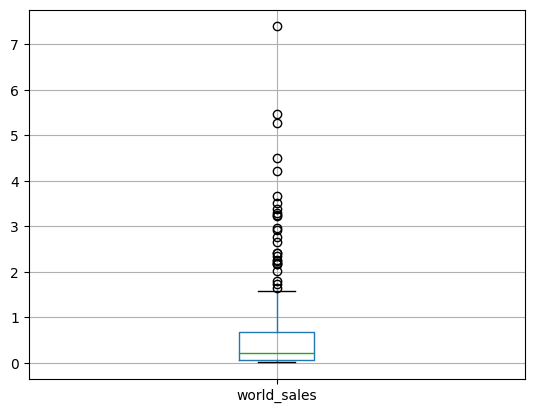

In [35]:
PS4_actual_data_games_sales = actual_data_games_sales.query('platform =="XOne"')
PS4_actual_data_games_sales.boxplot(column = 'world_sales')
PS4_actual_data_games_sales['world_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: world_sales, dtype: float64

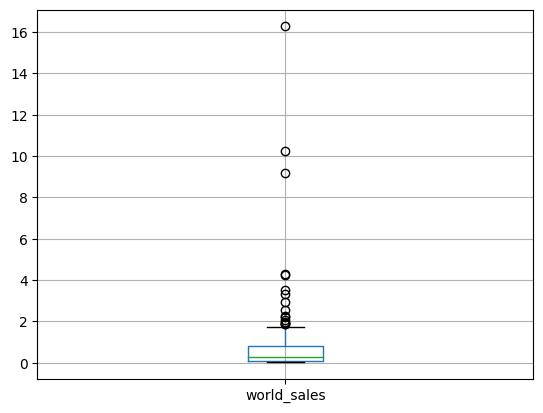

In [36]:
X360_actual_data_games_sales = actual_data_games_sales.query('platform =="X360"')
X360_actual_data_games_sales.boxplot(column = 'world_sales')
X360_actual_data_games_sales['world_sales'].describe()


count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: world_sales, dtype: float64

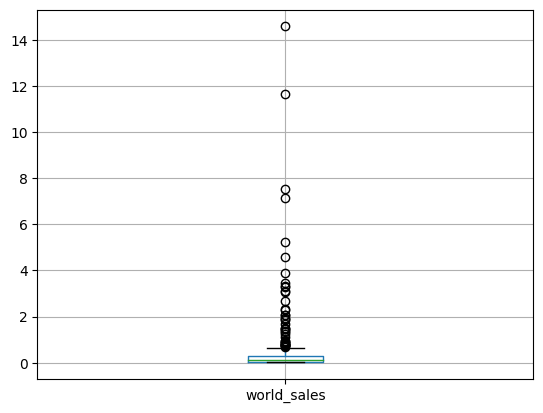

In [37]:
_3DS_actual_data_games_sales = actual_data_games_sales.query('platform =="3DS"')
_3DS_actual_data_games_sales.boxplot(column = 'world_sales')
_3DS_actual_data_games_sales['world_sales'].describe()

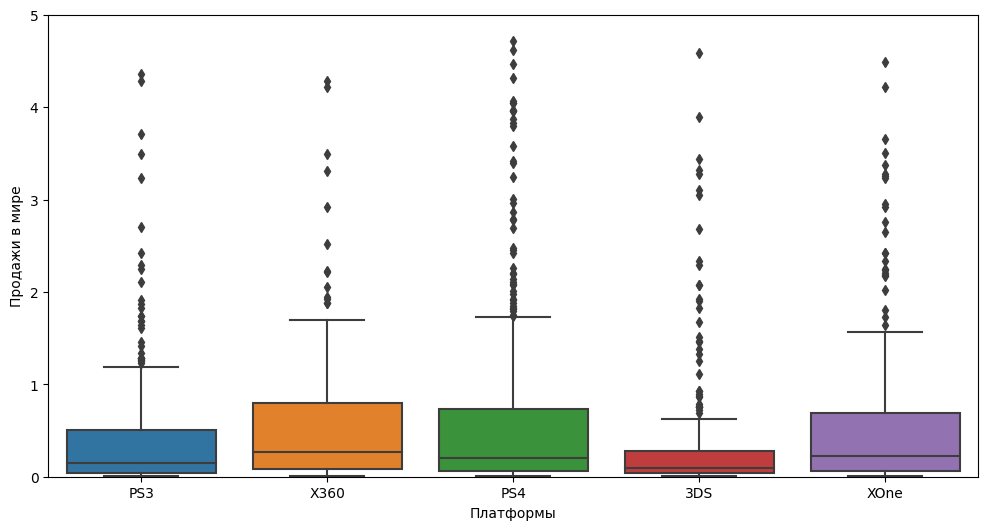

In [38]:
# Объединим данные для всех платформ
combined_data = actual_data_games_sales[actual_data_games_sales['platform'].isin(['PS4', 'PS3', 'XOne', 'X360', '3DS'])]

# Создадим boxplot с Seaborn
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика

# Строим boxplot
sns.boxplot(data=combined_data, x='platform', y='world_sales')

# Добавляем подписи к осям
plt.xlabel('Платформы')
plt.ylabel('Продажи в мире')

# Устанавливаем масштаб для лучшей видимости
plt.ylim(0, 5)  # Измените значения по мере необходимости

# Отображаем график
plt.show()



Разница в продажах отличается. Имеются очень популярные игры, которые продаются годами и дают много прибыли, таковых единицы. И много игр, которые не смогли преодолеть порог в 400 тыс. долларов за выбранный период.

Период 2013-2016 год

- Средняя выручка на игру по миру: 488 тыс. дол. 3/4 игр заработали до 400 тыс. Рекорд 21 млн.
- Средняя выручка на игру по платформе PS4: 801 тыс. 3/4 игр заработали до 730 тыс. Рекорд 14,6 млн.
- Средняя выручка на игру по платформе PS3: 526 тыс. 3/4 игр заработали до 510 тыс. Рекорд 21 млн.
- Средняя выручка на игру по платформе XOne: 645 тыс. 3/4 игр заработали до 685 тыс. Рекорд 7,4 млн.
- Средняя выручка на игру по платформе X360: 735 тыс. 3/4 игр заработали до 795 тыс. Рекорд 16,3 млн.
- Средняя выручка на игру по платформе 3DS: 472 тыс. 3/4 игр заработали до 280 тыс. Рекорд 14,6 млн.

Для PS4, PS3 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы делаются более популярные и продаваемые игры, чем на XOne и X360

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [39]:
PS4_sales_crit_and_user_ratings = PS4_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]


In [40]:
PS4_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

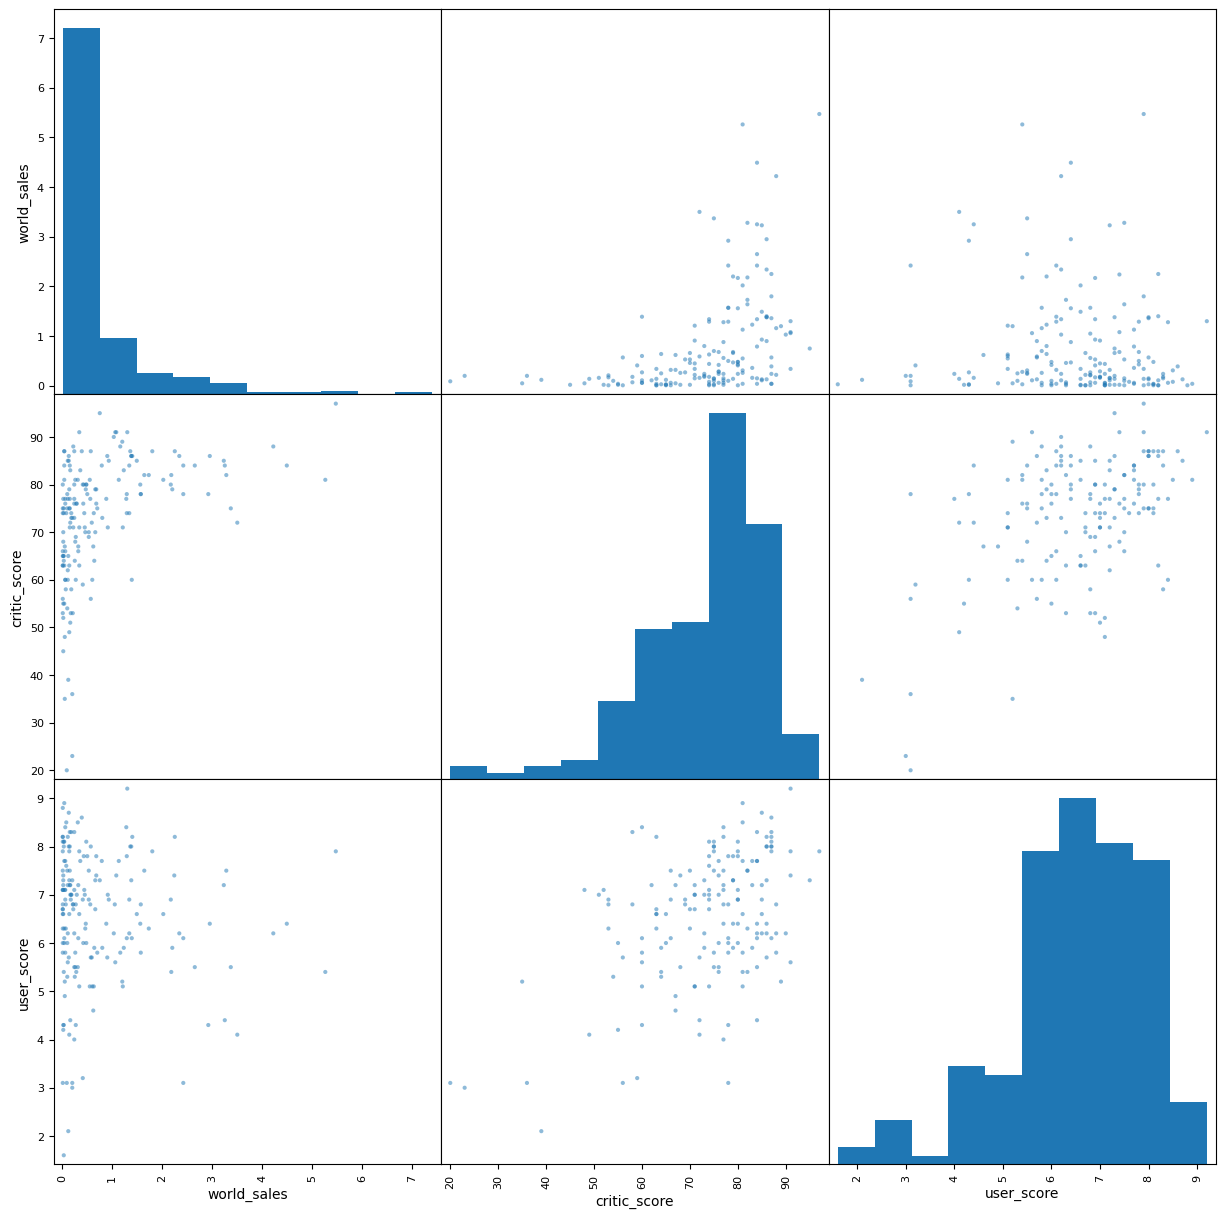

In [41]:
pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(15, 15))

Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла.

Важно заметить, что на мнение игроков влияет рейтинг. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.



### Соотнесите выводы с продажами игр на других платформах.

In [42]:
PS3_sales_crit_and_user_ratings = PS3_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
PS3_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

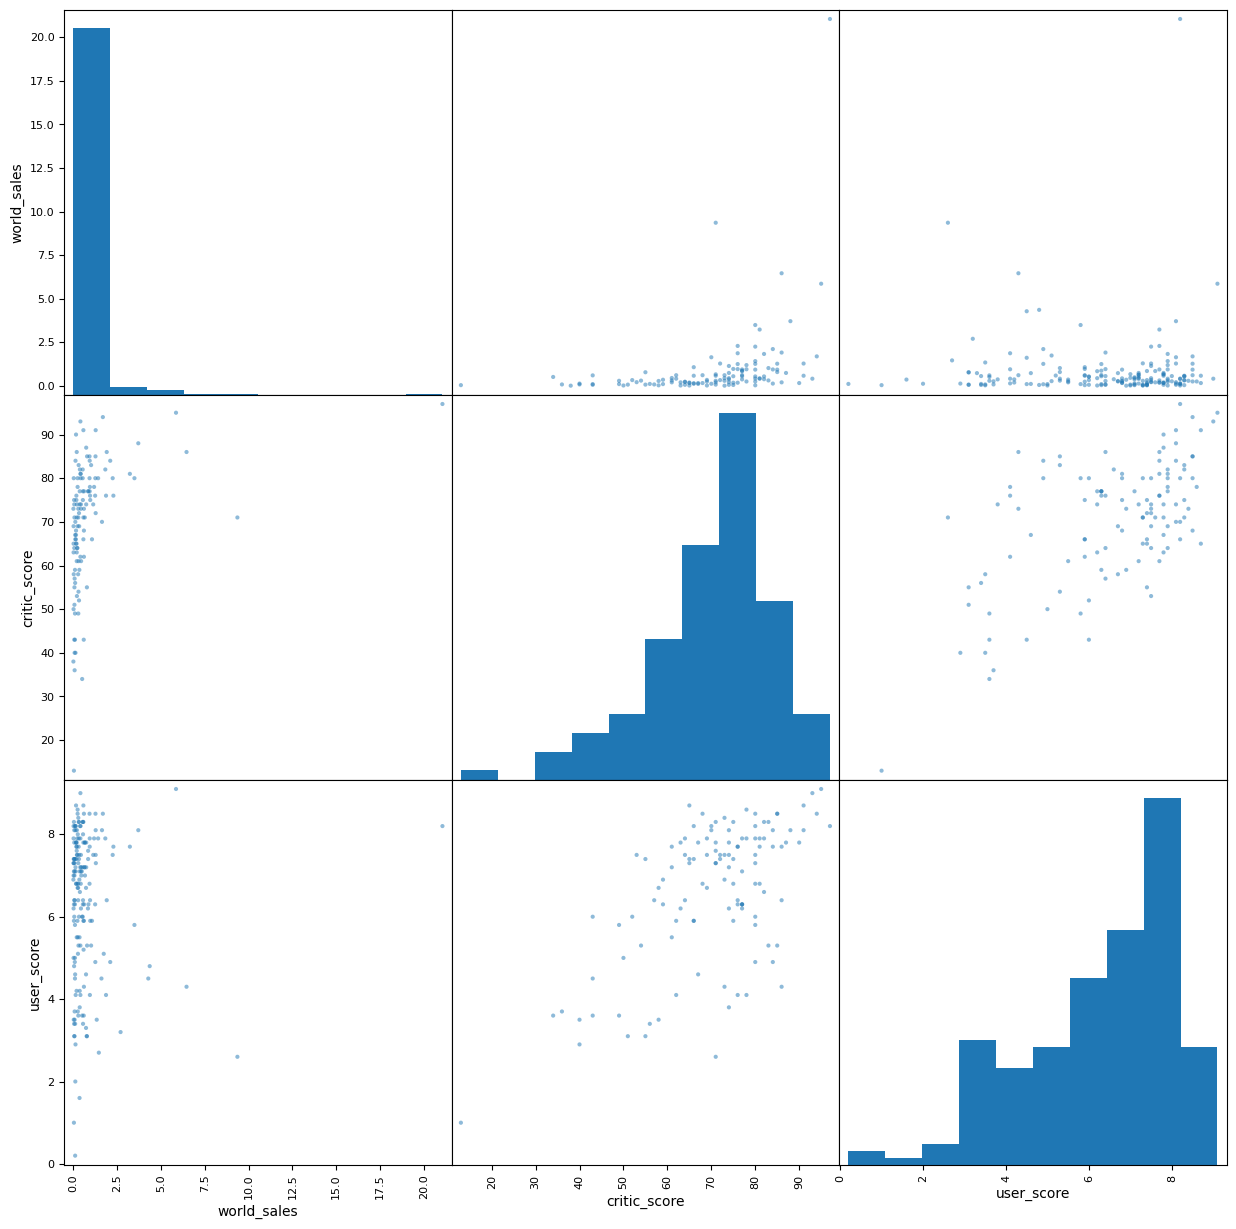

In [43]:
pd.plotting.scatter_matrix(PS3_sales_crit_and_user_ratings, figsize=(15, 15))

По платформе PS3 имеются похожие тенденции как и у PS4, только хуже.

In [44]:
X360_sales_crit_and_user_ratings = X360_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
X360_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

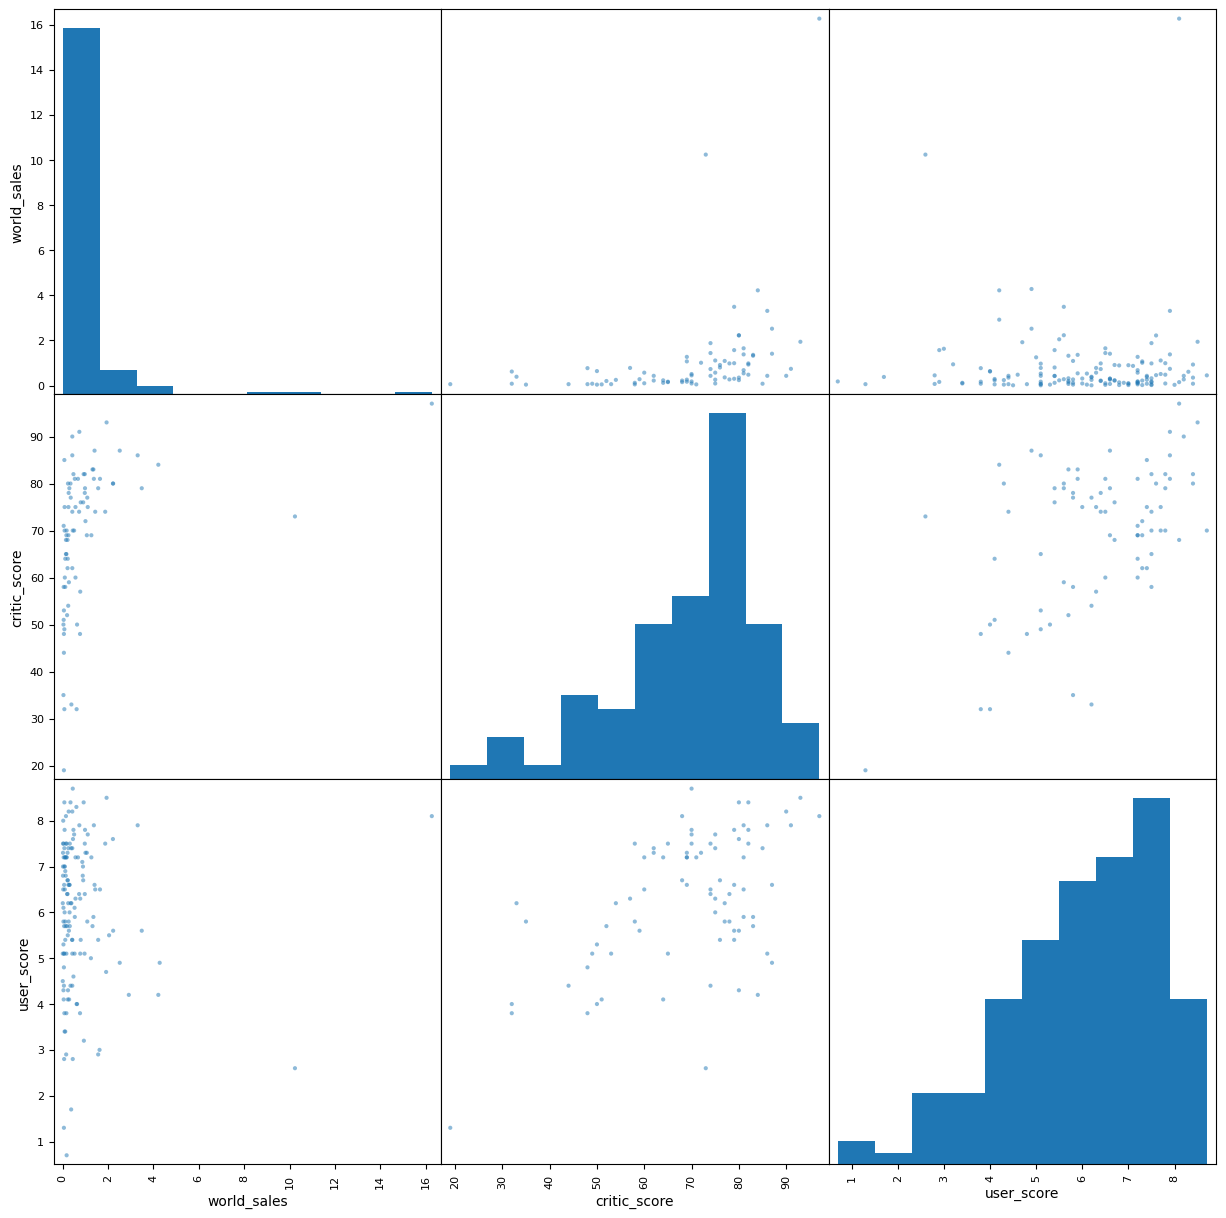

In [45]:
pd.plotting.scatter_matrix(X360_sales_crit_and_user_ratings, figsize=(15, 15))

In [46]:
_3DS_sales_crit_and_user_ratings = _3DS_actual_data_games_sales.loc[:,['world_sales', 'critic_score', 'user_score']]
_3DS_sales_crit_and_user_ratings.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


array([[<AxesSubplot:xlabel='world_sales', ylabel='world_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='world_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='world_sales'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='world_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

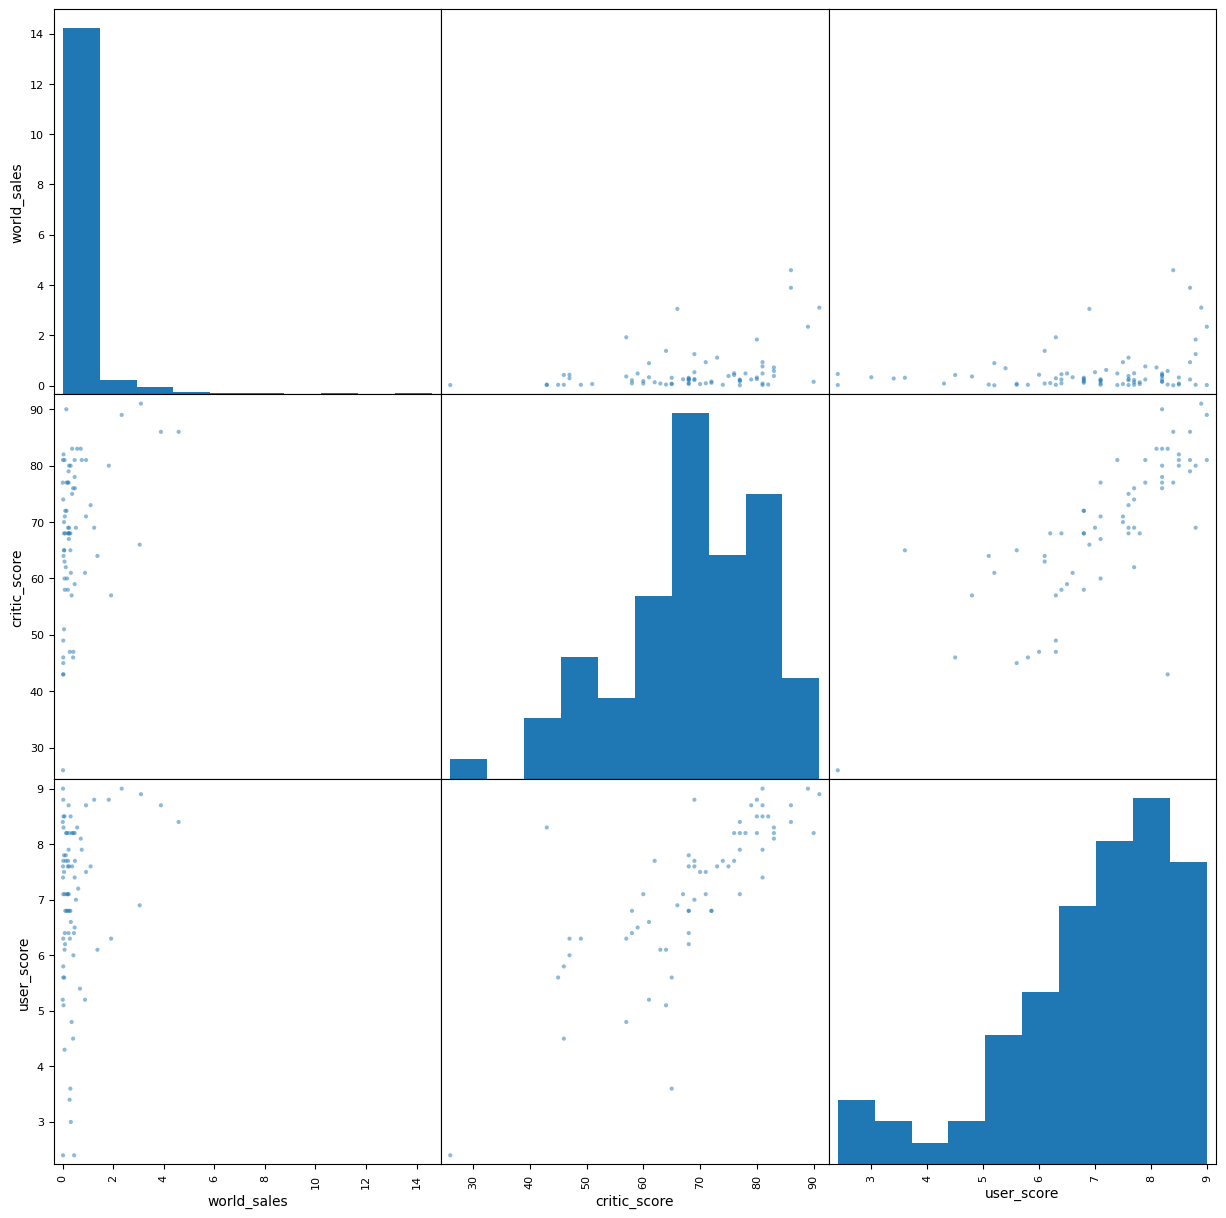

In [47]:
pd.plotting.scatter_matrix(_3DS_sales_crit_and_user_ratings, figsize=(15, 15))

Платформы PS3, X360 имеют похожие связи, как и у PS4.

Выделяется 3DS, чьи продажи зависят напрямую, хоть и не сильно от рейтинга игроков. Возможно здесь идет лучше работа по составлению рейтинга для игр и системы отзывов для игроков. А может игры в целом очень популярные и интересные и их не очень много, как у других платформ.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [48]:
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='sum')
genre_pivot_table.sort_values('world_sales', ascending=False)

,world_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [49]:
# Создайте сводную таблицу для суммарных продаж по жанрам
genre_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='sum')

# Создайте сводную таблицу для средних продаж по жанрам
mean_sales_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='mean')

# Создайте сводную таблицу для медианных продаж по жанрам
median_sales_pivot_table = pd.pivot_table(actual_data_games_sales, index='genre', values='world_sales', aggfunc='median')

# Сортируйте таблицы по суммарным продажам, средним продажам и медианным продажам
genre_pivot_table = genre_pivot_table.sort_values('world_sales', ascending=False)
mean_sales_pivot_table = mean_sales_pivot_table.sort_values('world_sales', ascending=False)
median_sales_pivot_table = median_sales_pivot_table.sort_values('world_sales', ascending=False)


In [50]:
print("Суммарные продажи по жанрам:")
genre_pivot_table

Суммарные продажи по жанрам:


,world_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [51]:
print("Средние продажи по жанрам:")
mean_sales_pivot_table

Средние продажи по жанрам:


,world_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


In [52]:
print("Медианные продажи по жанрам:")
median_sales_pivot_table

Медианные продажи по жанрам:


,world_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Самыми прибыльными жанрами можно считать экшен(Action), шутеры(Shooter), спортивные игры (Sports) и ролевые игры (Role-Playing).

Не смотря на то, что суммарные продаши Экшн игр самые большие, средние и медианные значения продаж уступаю другим жанрам перечисленным выше.

Популярность экшена обусловлена историей создания игр и желания людей проверить свои навыки ловкости и реакции. Очень похожий на него тип жанра Misc.

Популярность шутеров, спортивых игр и ролевых игр обусловлена тем, что в большинстве из них играют несколько игроков одновременно. Так получаются соревнования формата 1х1, 2х2, 3х3, 5х5 и т.д.

Ролевые игры затягивают игроков своей сложностью к прохождению игры и соответсвенно в нее играют часто и даже перепроходят много раз, что увеличивает интерес к будущим дополнениям или повышают вероятность рассказа об этой игре друзьям.

На период 2013-2016 год не пользуются популярностью приключения (Adventure), симуляторы(Simulation) стратегии реального времени или пошаговые (Strategy) и головоломки (Puzzle).

Головоломки были популярны с 80х годов, но сейчас становится все меньше ценителей этого жанра. Текущее поколение хочет захватывающих действий. Приключение, хоть и появилось позже, оно имеет похожую тенденцию.

Симуляторы - это повторение реальной жизни или аспектов реальной жизни сейчас, в прошлом или в будущем. Этот жанр на любителя делать так, как ему хочется.

Стратегии редко когда поднимаются в рейтингах по продажам в ввиду еще большей трудности и иногда неторопливости процесса.

**Вывод по шагу 3**

Были даны ответы на все поставленые вопросы и рассуждения подкреплены обоснованиями.

Обобщенный вывод на 2017 год ожидается подъем продаж по PS4, XOne и 3DS, так как уже многие студии-разработчики нашли применения своих техологий на этих платформах и хотят попасть на все рынки.

## (Шаг 4). Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [53]:
na_actual_data_games_sales = actual_data_games_sales.query('na_sales > 0')
na_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   float64
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    float64
 9   user_score       974 non-null    float64
 10  rating           1309 non-null   object 
 11  world_sales      1309 non-null   float64
dtypes: float64(8), object(4)
memory usage: 132.9+ KB


In [54]:
eu_actual_data_games_sales = actual_data_games_sales.query('eu_sales > 0')
eu_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   float64
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    float64
 9   user_score       1047 non-null   float64
 10  rating           1422 non-null   object 
 11  world_sales      1422 non-null   float64
dtypes: float64(8), object(4)
memory usage: 144.4+ KB


In [55]:
jp_actual_data_games_sales = actual_data_games_sales.query('jp_sales > 0')
jp_actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   float64
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    float64
 9   user_score       462 non-null    float64
 10  rating           1187 non-null   object 
 11  world_sales      1187 non-null   float64
dtypes: float64(8), object(4)
memory usage: 120.6+ KB


**Найдем по каждому региону популярную платформу.**

In [56]:
# Напишем функцию для выделение Топ-5 значеий, а остальные будут называтьсЯ другие.

def get_top_5(pivot_table):
    top_5 = pivot_table.head(5)

    other_sales = pivot_table.iloc[5:].sum()

    top_5 = top_5.append(pd.Series(other_sales, name='Другие'))

    return top_5


In [57]:
na_platform_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_platform_top_5 = get_top_5(na_platform_pivot_table)
na_platform_top_5

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
Другие,52.49


In [58]:
eu_platform_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_platform_top_5 = get_top_5(eu_platform_pivot_table)
eu_platform_top_5

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
Другие,58.26


In [59]:
jp_platform_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_platform_top_5 = get_top_5(jp_platform_pivot_table)
jp_platform_top_5

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
Другие,4.19


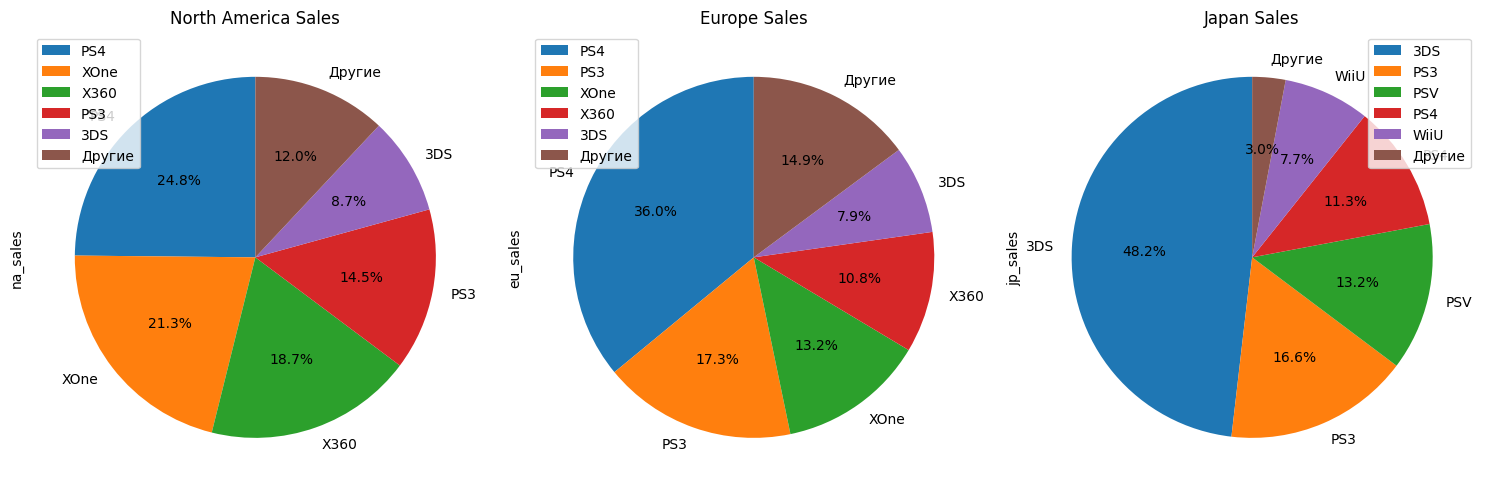

In [60]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

na_platform_top_5.plot.pie(y='na_sales', ax=axes[0], autopct='%1.1f%%', startangle=90)
eu_platform_top_5.plot.pie(y='eu_sales', ax=axes[1], autopct='%1.1f%%', startangle=90)
jp_platform_top_5.plot.pie(y='jp_sales', ax=axes[2], autopct='%1.1f%%', startangle=90)

axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

plt.tight_layout()
plt.show()

Рейтинг платформ:

1. Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS
2. Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS
3. Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU

Различия по популярности платформ в первую очередь зависят от влияния фирмы. Как результат во всех рейтингах есть продукция компании Sony.

Во-вторых - местоположение компании. Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

**Найдем по каждому региону популярный жанр.**

In [61]:
na_genre_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_genre_top_5 = get_top_5(na_genre_pivot_table)
na_genre_top_5

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Другие,62.76


In [62]:
eu_genre_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_genre_top_5 = get_top_5(eu_genre_pivot_table)
eu_genre_top_5

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Другие,68.56


In [63]:
jp_genre_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)

jp_genre_top_5 = get_top_5(jp_genre_pivot_table)
jp_genre_top_5


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Другие,25.79


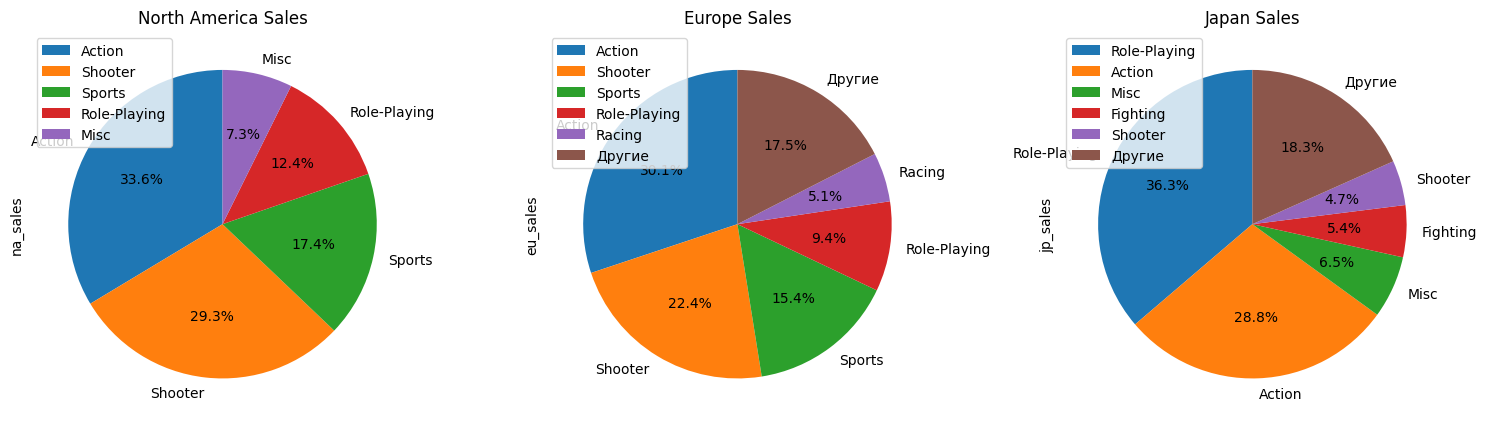

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

na_genre_top_5.head(5).plot.pie(y='na_sales', ax=axes[0], autopct='%1.1f%%', startangle=90)
eu_genre_top_5.plot.pie(y='eu_sales', ax=axes[1], autopct='%1.1f%%', startangle=90)
jp_genre_top_5.plot.pie(y='jp_sales', ax=axes[2], autopct='%1.1f%%', startangle=90)

axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

plt.tight_layout()
plt.show()

Рейтинг жанров:

1. Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
2. Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
3. Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

По классификации Кроуфорда miscellaneous game (Misc) - игры в категории skill-and-action. Они не относятся к боевым играм(Combat),играм с выходом из лабиринта(Maze), спортивным играм(Sports), играм на удержание мяча(Paddle) или гонкам(Race). Это новые игры, где проверяется ловкость и реакция игрока другими способами.

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен, т.к. многие поколения выросли на этом жанре, и шутеры, т.к. это имитация боевых действий.

**Найдем влияние рейтинга на каждый регион.**

In [65]:
na_rating_pivot_table = pd.pivot_table(na_actual_data_games_sales, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,165.21
No ESRB,89.42
E,79.05
E10+,54.24
T,49.79


In [66]:
eu_rating_pivot_table = pd.pivot_table(eu_actual_data_games_sales, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,145.32
E,83.36
No ESRB,78.91
E10+,42.69
T,41.95


In [67]:
jp_rating_pivot_table = pd.pivot_table(jp_actual_data_games_sales, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
No ESRB,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


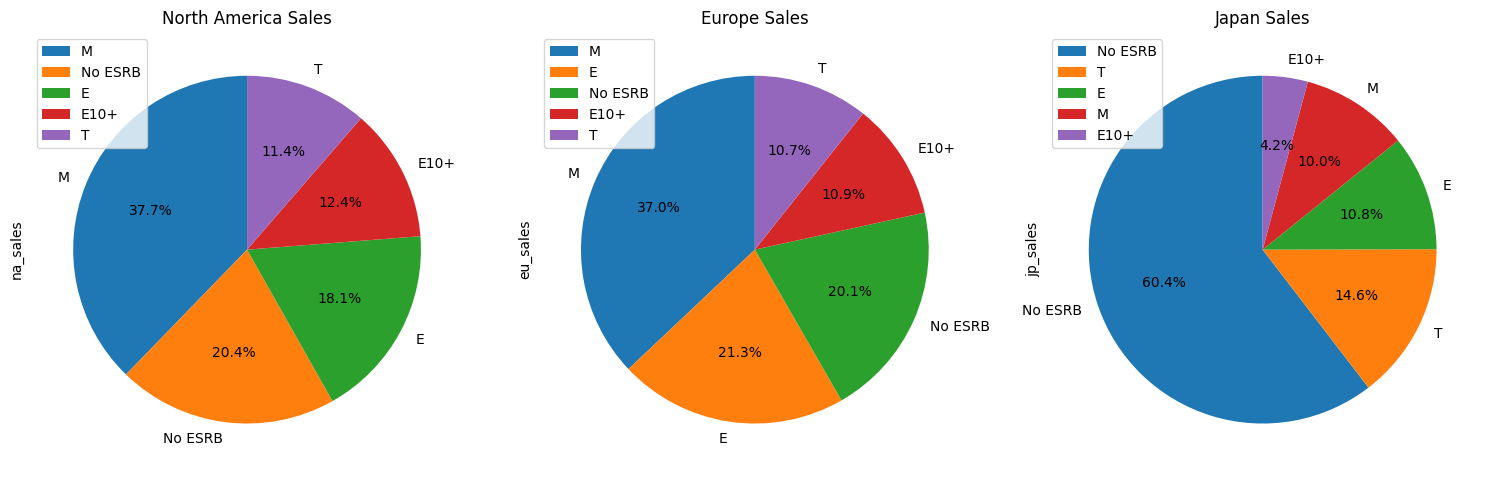

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

na_rating_pivot_table.head(5).plot.pie(y='na_sales', ax=axes[0], autopct='%1.1f%%', startangle=90)
eu_rating_pivot_table.plot.pie(y='eu_sales', ax=axes[1], autopct='%1.1f%%', startangle=90)
jp_rating_pivot_table.plot.pie(y='jp_sales', ax=axes[2], autopct='%1.1f%%', startangle=90)

axes[0].set_title('North America Sales')
axes[1].set_title('Europe Sales')
axes[2].set_title('Japan Sales')

plt.tight_layout()
plt.show()

В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение. Также очень много игр без рейтинга.

**Вывод по шагу 4.**

Проведя анализ по регионам можно составить портрет игрока.

Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит игры на реакцию и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит игры на реакцию и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит тратить время на RPG и экшены.

## (Шаг 5). Проверка гипотез

Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;  
Какой критерий применили для проверки гипотез и почему.

Подготовим данные по первой гипотезе. Не будем учитывать игры с пустым рейтингом

In [69]:
def stat_info(serie, bins=0):
    serie_description = serie.describe()
    mean = serie_description[1]
    std = serie_description[2]
    d_min = serie_description[3]
    q1 = serie_description[4]
    median = serie_description[5]
    q3 = serie_description[6]
    d_max = serie_description[7]
    left_border = d_min
    right_border = d_max
    if bins == 0:
        bins = right_border - left_border
        if bins>100:
            bins = 100
        elif bins < 1:
            bins = abs(bins*10)+1
        bins = int(bins)
    else:
        bins = bins
    serie.hist(bins=bins, range=(left_border, right_border))
    print(serie_description)
    variance_estimate = np.var(serie, ddof=1)
    standart_dev = np.std(serie, ddof=1)
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standart_dev))
    return [mean, variance_estimate, standart_dev]

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.52
Дисперсия: 1.91
Стандартное отклонение: 1.38


[6.521428571428572, 1.9069968429360695, 1.380940564592144]

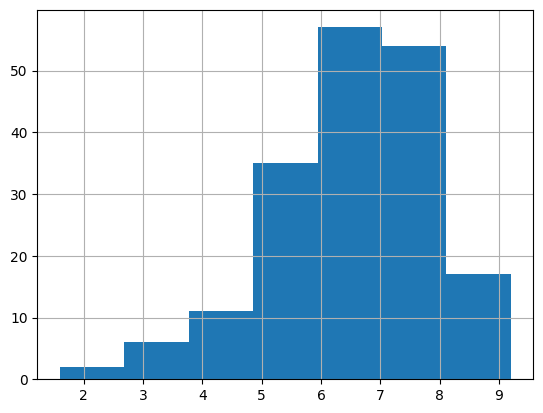

In [70]:
user_rating_XOne = actual_data_games_sales.query('platform == "XOne"')['user_score'].dropna()
stat_info(user_rating_XOne)

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.27
Дисперсия: 3.04
Стандартное отклонение: 1.74


[6.2696774193548395, 3.035892752408882, 1.7423813452883619]

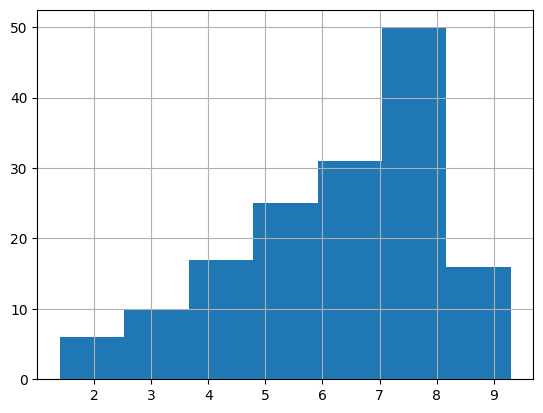

In [71]:
user_rating_PC = actual_data_games_sales.query('platform == "PC"')['user_score'].dropna()
stat_info(user_rating_PC)


На первый взгляд средние похожи, но вот дисперсия выборок отличается.

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

In [72]:
alpha = 0.01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Рейтинги в целом похожи друг на друга, что и подтверждает нулевую гипотезу.

**Проверим вторую гипотезу**

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Среднее значение: 6.84
Дисперсия: 1.77
Стандартное отклонение: 1.33


[6.837532133676092, 1.7693609042482705, 1.3301732609883083]

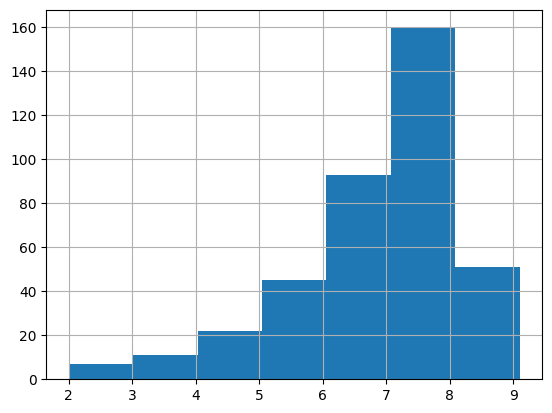

In [73]:
user_rating_Action = actual_data_games_sales.query('genre == "Action"')['user_score'].dropna()
stat_info(user_rating_Action)

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.24
Дисперсия: 3.18
Стандартное отклонение: 1.78


[5.238124999999999, 3.180612814465409, 1.7834272663793747]

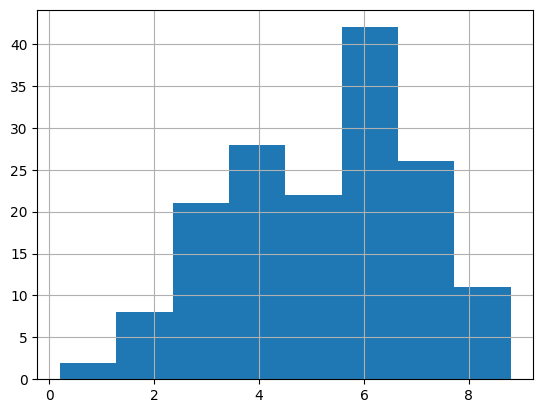

In [74]:
user_rating_Sports = actual_data_games_sales.query('genre == "Sports"')['user_score'].dropna()
stat_info(user_rating_Sports)

На первый взгляд по статистическим данным все отличается.

Нулевая гипотеза первой гипотезы гласит: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Альтернативная гипотеза гласит: "Средние пользовательские рейтинги жанров Action и Sports различаются".

Для оценки гипотезы будем применять тест Стюдента. Соотвественно, мы можем получить два ответа "Отвергаем нулевую гипотезу" и "Не получилось отвергнуть нулевую гипотезу".

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что гипотеза противоречит эмпирическим данным и скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

In [75]:
alpha = 0.01

results = st.ttest_ind(user_rating_Action, user_rating_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Тест Стьюдента не подтвердил наши догадки о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые

**Вывод по шагу 5.**

Первая гипотеза подтвердились.

Платформа XOne старается из года в год набирать новых пользователей, чтобы соревноваться не только с PS4, но и с самой распространненной платформой на земле PC. На 2016 год по качеству игр они близки к компьютерным.

Различия между Action и Sports существуют из-за опыта создания игр. Первые экшены появились в 80х годах и из года в год они становятся интересней, так как им есть на что ровняться в прошлом. У спортивных игр в большинстве случаев ограничением в рейтингах стоит симуляция реальных спортивных игр. И любителям этой серии иногда приходиться сталкиваться с непонятными решениями в этих играх.

## (Шаг 6). Общий вывод по проекту

В ходе проделанной работы было выполнено:

1. Просмотрена таблица, выявлены аномалии и пропущенные значения.
2. Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Проведен анализ по данным и подготовлены актуальные данные.
4. Составлены портреты пользователей для купных регионов продаж.
5. Выполнены проверки гипотез.

Продажи компьютерных игр зависят от трех основных составляющих: кто игру создал, на какой платформе она сделана и какого она жанра.

1. По первому пунку сейчас популярны компании, которые уже давно разрабатывают игры. Они используют свои любимые жанры и уже накопили аудиторию фанатов, которая обязательно купит их игру.
2. Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
3. Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.

Сводный анализ для кампании на 2017 год.

1. Делать ставку на современные платформы. Покупать вышедшие и новые игры на PS4, XOne и 3DS.
2. Выставлять на прилавки популярные жанры - экшен, шутеры, спортивные и ролевые игры.
3. Следить за своей аудиторией. В основом большинство игр рассчитано на игроков, которым 17 лет и старше.
4. Не забывать распространять компьютерные игры и портации игр с популярных платформ на PC. Компьютер еще долго не выйдет из конкуренции за игроков.